In [1]:
from PIL import Image, ImageDraw
import os
import json
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def load_json(file):
    with open(file, 'r') as f:
        return json.load(f)

In [3]:
plates = pd.read_csv('submission.csv')

In [4]:
plates.loc[0]

file_name        test/1486.jpg
plates_string         43осEEAс
Name: 0, dtype: object

In [5]:
def plot_plate(plate_info):
    path = './data/'+plate_info['file_name']
    plate_string = plate_info['plates_string']
    im = Image.open(path)
    print(plate_string)
    return im

MсAС48hAk


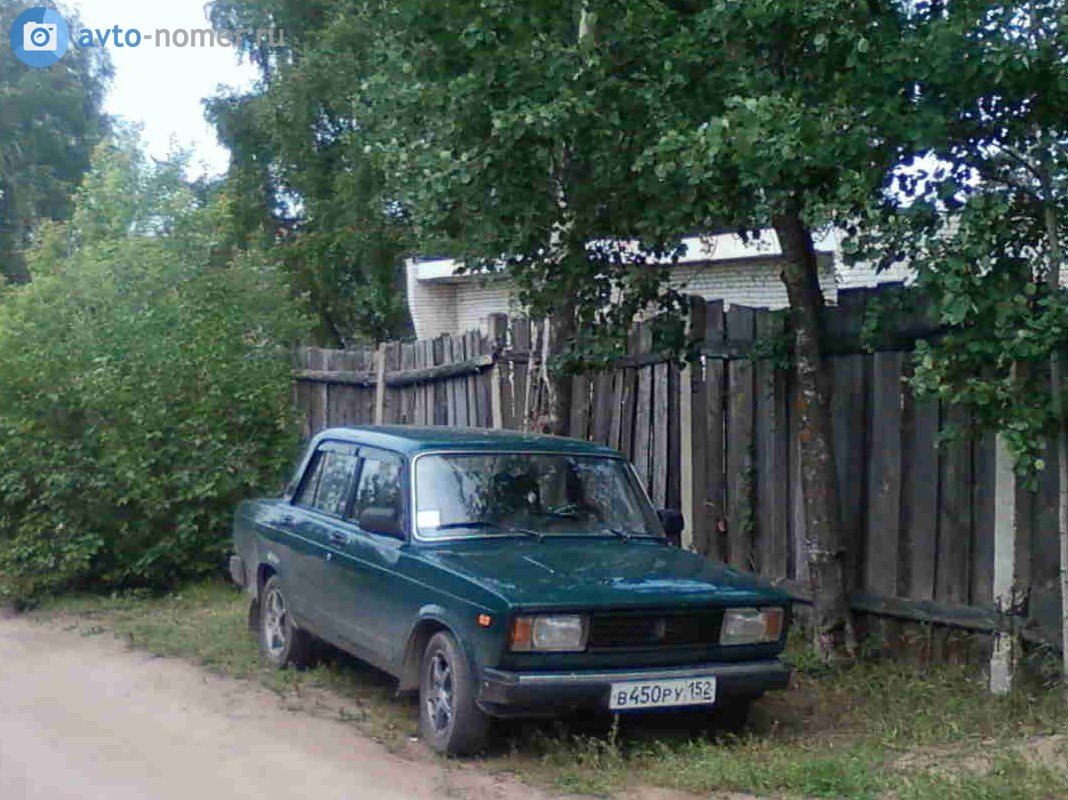

In [6]:
plot_plate(plates.loc[300])

In [7]:
train_desc = load_json('./data/train.json')
test_desc = load_json('./data/test.json')

In [8]:
my_syms = list()

In [9]:
for td in train_desc:
    my_syms.append(list(set(td['nums'][0]['text'])))

In [10]:
import numpy as np

In [11]:
set(train_desc[0]['nums'][0]['text'])

{'0', '1', '2', '5', '6', 'B'}

In [12]:
train_desc[0]['nums'][0]['text']

'B060BB125'

In [13]:
def plot_num_image(desc):
    path = desc['file']
    im = Image.open(path)
    
    p1, p2, p3, p4 = desc['nums'][0]['box']
    
    draw = ImageDraw.Draw(im)
    draw.line((p1[0], p1[1], p3[0], p3[1]), fill=(255,0,0,228))
    draw.line((p3[0], p3[1], p2[0], p2[1]), fill=(255,0,0,228))
    draw.line((p4[0], p4[1], p2[0], p2[1]), fill=(255,0,0,228))
    draw.line((p4[0], p4[1], p1[0], p1[1]), fill=(255,0,0,228))
    #draw.line((0, im.size[1], im.size[0], 0), fill=128)
    del draw
    
    return im

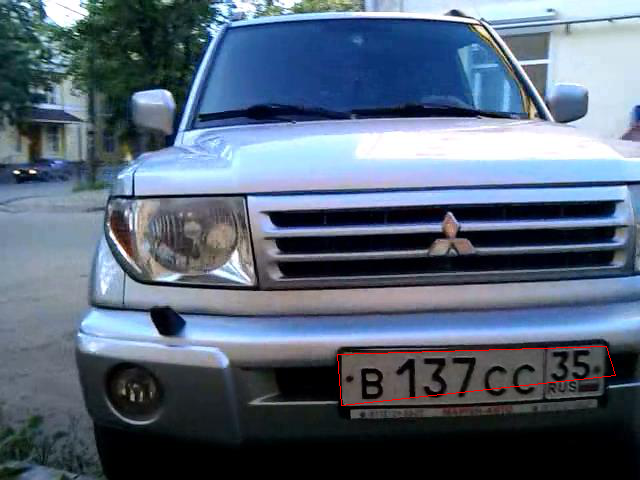

In [14]:
plot_num_image(test_desc[1900])